# Juan Carlos Cox Fernández

# PIP install

In [26]:
pip install ucimlrepo

# Librerias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, accuracy_score
import joblib

# Vinos Tintos

## Importar dataset

In [28]:
red_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
white_wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")

# Seleccionar características y etiquetas para vinos tintos
X_red = red_wine.drop(columns=['quality'])
y_red = red_wine['quality']

## Matriz de correlación

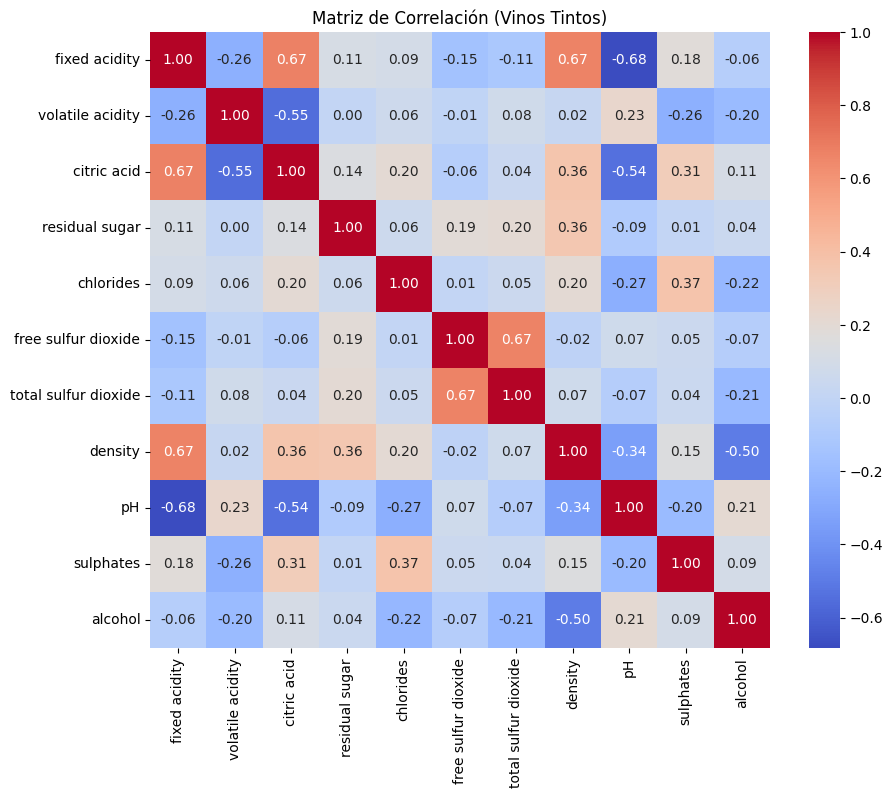

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(X_red.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Vinos Tintos)")
plt.show()

## SelectKBest

In [30]:
X_selected_red = SelectKBest(score_func=f_classif, k=8).fit_transform(X_red, y_red)

## Comparar modelos con validación cruzada

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_red, y_red, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

In [32]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)

print(f"Naive Bayes Accuracy: {nb_scores.mean():.4f}")

Naive Bayes Accuracy: 0.5614


## KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

print(f"KNN Accuracy: {knn_scores.mean():.4f}")

KNN Accuracy: 0.5950


## Entrenar el mejor modelo


In [34]:
best_model = nb if nb_scores.mean() > knn_scores.mean() else knn
best_model.fit(X_train, y_train)

KNeighborsClassifier()

## Matriz de confusión

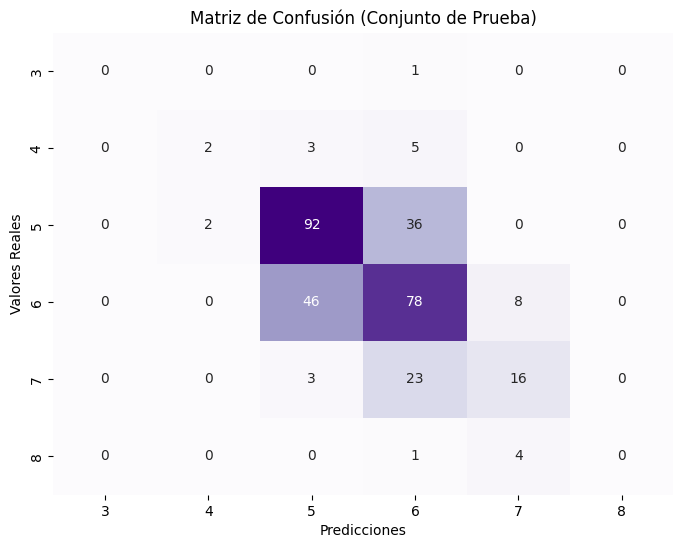

In [35]:
# Predicción con el mejor modelo
y_pred = best_model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Conjunto de Prueba)")
plt.show()

## Guardar modelo

In [36]:
joblib.dump(best_model, "best_wine_model.pkl")

['best_wine_model.pkl']

## Cargar modelo

In [37]:
loaded_model = joblib.load("best_wine_model.pkl")

## Aplicar modelo

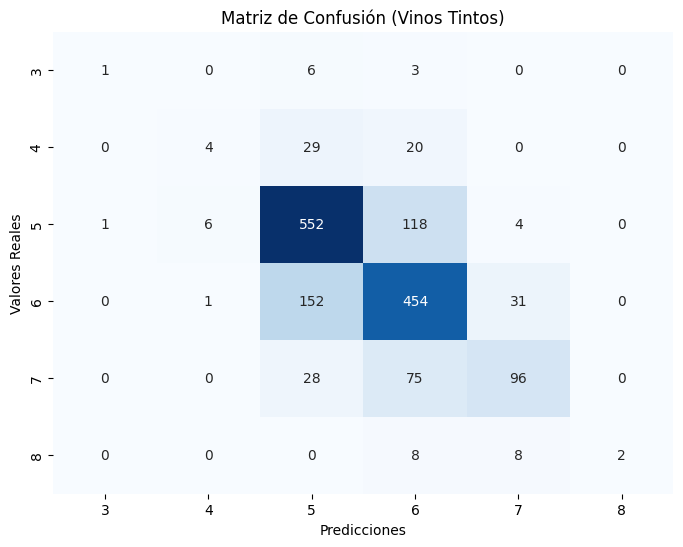

In [38]:
# Predicciones
y_full_pred = loaded_model.predict(scaler.transform(X_selected_red))

# Matriz de confusión
conf_matrix_full = confusion_matrix(y_red, y_full_pred)

# Visualización estética
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=np.unique(y_red), yticklabels=np.unique(y_red))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Vinos Tintos)")
plt.show()


## Comparar con etiquetas reales

In [39]:
accuracy = accuracy_score(y_red, y_full_pred)
print(f"Precisión global del modelo: {accuracy:.4f}")

Precisión global del modelo: 0.6936


# Vinos Blancos

## características, etiquetas y matriz de correlación

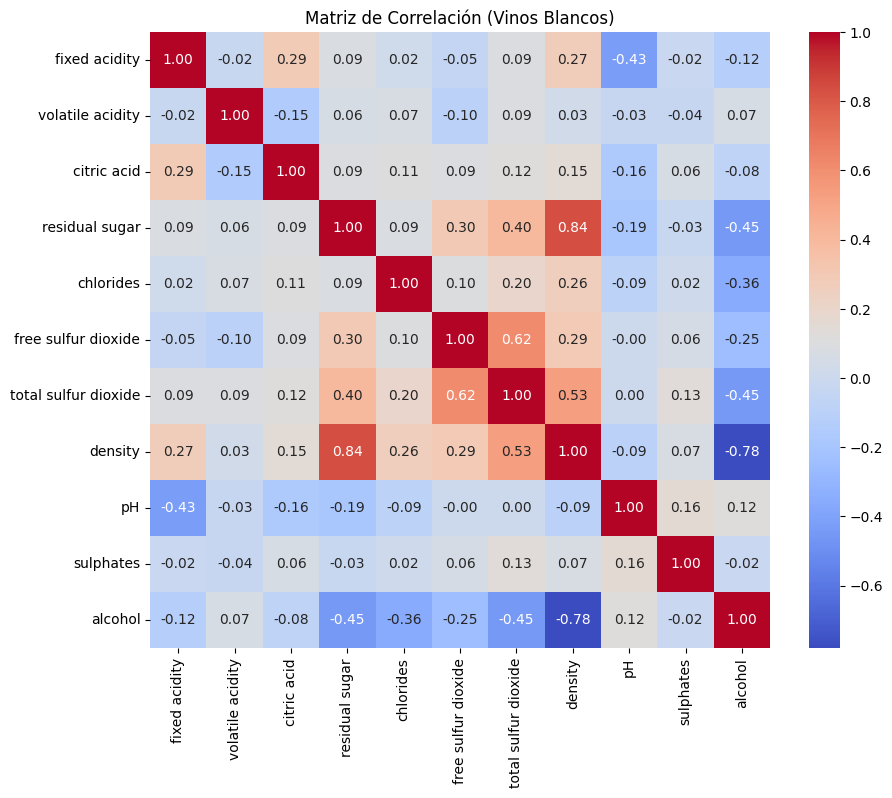

In [40]:
X_white = white_wine.drop(columns=['quality'])
y_white = white_wine['quality']

plt.figure(figsize=(10,8))
sns.heatmap(X_white.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Vinos Blancos)")
plt.show()

## SelecKBest

In [41]:
X_selected_white = SelectKBest(score_func=f_classif, k=8).fit_transform(X_white, y_white)

X_train, X_test, y_train, y_test = train_test_split(X_selected_white, y_white, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Naive Bayes

In [42]:
nb = GaussianNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5)

print(f"Naive Bayes Accuracy: {nb_scores.mean():.4f}")

Naive Bayes Accuracy: 0.4400


## KNN

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)

print(f"KNN Accuracy: {knn_scores.mean():.4f}")

KNN Accuracy: 0.5350


## Entrenar el mejor modelo y Matriz de confusión

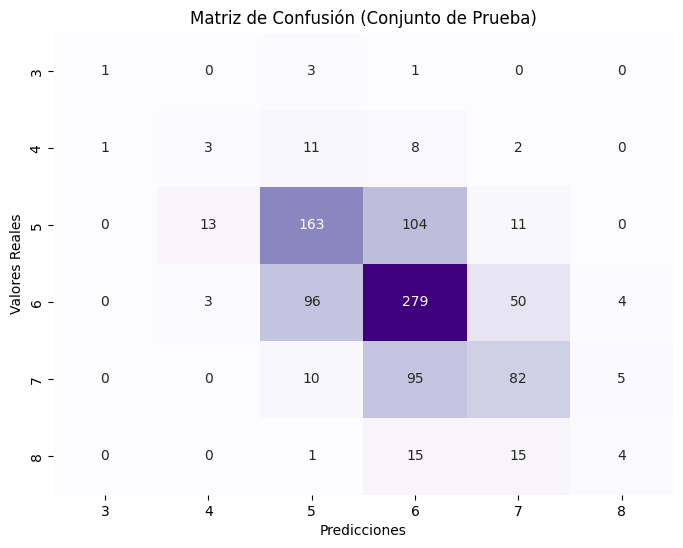

In [44]:
best_model = nb if nb_scores.mean() > knn_scores.mean() else knn
best_model.fit(X_train, y_train)

# Predicción con el mejor modelo
y_pred = best_model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False,
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Conjunto de Prueba)")
plt.show()

## Guardar y cargar el modelo

In [45]:
joblib.dump(best_model, "best_white_wine_model.pkl")
loaded_model = joblib.load("best_white_wine_model.pkl")

## Aplicar modelo

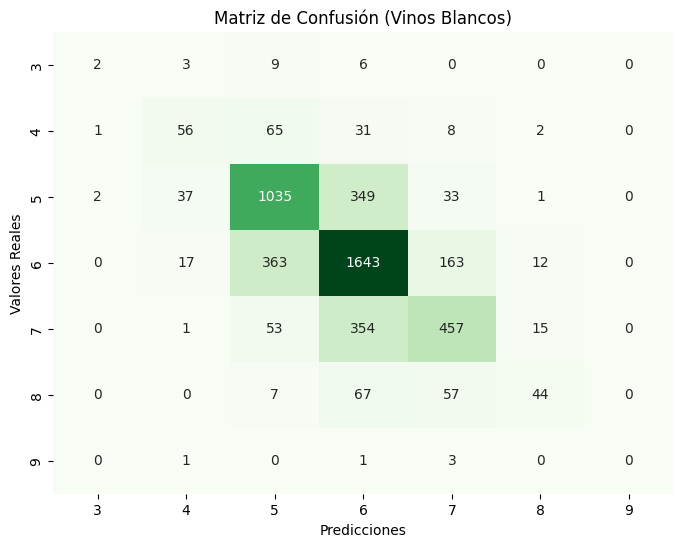

In [46]:
# Predicciones en vinos blancos
y_full_pred = loaded_model.predict(scaler.transform(X_selected_white))

# Matriz de confusión
conf_matrix_full = confusion_matrix(y_white, y_full_pred)

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_full, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=np.unique(y_white), yticklabels=np.unique(y_white))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión (Vinos Blancos)")
plt.show()

## Comparar con etiquetas reales

In [47]:
accuracy = accuracy_score(y_white, y_full_pred)
print(f"Precisión global del modelo: {accuracy:.4f}")

Precisión global del modelo: 0.6609
